# Konwolucyjne sieci neuronowe

## Convolution neural networks, CNN

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtrowanie (2D) wygląda tak:

<img src="https://i.stack.imgur.com/FjvuN.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


# Zad

Pobierzmy zbiór danych

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [1]:

from math import ceil

import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import History
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from numpy.random import seed
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow import keras

2024-06-09 21:54:02.798113: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-09 21:54:02.831459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 21:54:03.342732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
seed(123)

In [3]:
# Load data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
print(f"n_samples: {n_samples}, pic_size: {h} x {w}")
X = lfw_people.data
n_features = X.shape[1]
print(f"n_features: {n_features}")

y = lfw_people.target
target_names = lfw_people.target_names

n_samples: 1288, pic_size: 50 x 37
n_features: 1850


In [4]:
X[0]  # vector, will be reshaped to matrix

array([0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
       0.3803922 ], dtype=float32)

In [5]:
X.shape

(1288, 1850)

In [6]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [7]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [8]:
# prepare for categorical crossentropy
y = keras.utils.to_categorical(y)
y[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])

In [9]:
n_classes = y.shape[1]
n_classes

7

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])
print(X_train.shape)

(772, 50, 37, 1)


### skalowanie X

In [11]:
X_train = X_train / 255
X_test = X_test / 255

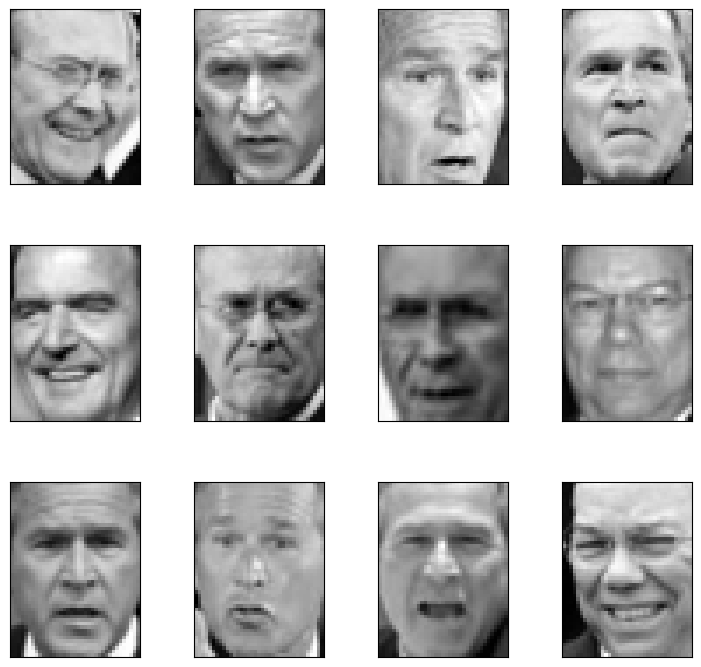

In [12]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:, :, 0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.show()

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(772, 50, 37, 1)
(772, 7)
(516, 50, 37, 1)


# Zad. (Punkt odniesienia)

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwową licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [14]:
def plot_model_history(history, title, accuracy, ax=None, *, y_lim: tuple = None):
    if ax is None:
        ax = plt.gca()
    ax.plot(history.history['categorical_accuracy'], label="tarina")
    ax.plot(history.history['val_categorical_accuracy'], label="test")
    ax.set_title(f"{title}\naccuracy: {accuracy:.3f}")
    if y_lim:
        ax.set_ylim(*y_lim)
    ax.legend()

In [15]:
def train_model(model):
    history = History()
    early_stopping = EarlyStopping(patience=20, monitor="val_loss")
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])
    model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping, history])
    loss, accuracy = model.evaluate(X_test, y_test)
    return model, history, loss, accuracy

In [16]:
dict_models = {}

In [17]:
def plot_all_models(*, n_rows=1, y_lim=None):
    _, axs = plt.subplots(n_rows, ceil(len(dict_models) / n_rows), figsize=(20, 4 * n_rows))

    for ax, (name, (model, history, loss, accuracy)) in zip(axs.flatten(), dict_models.items()):
        plot_model_history(history, name, accuracy, ax=ax, y_lim=y_lim)

    plt.subplots_adjust(hspace=0.7)
    plt.show()

In [18]:
model1 = Sequential()
model1.add(Flatten(input_shape=X_train.shape[1:]))
model1.add(Dense(n_classes, activation="softmax"))
# model1.summary()

dict_models["Dense_1"] = train_model(model1)

Epoch 1/100


/home/krystianjachna/Desktop/AI/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-06-09 21:54:05.354219: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.3361 - loss: 1.9365 - val_categorical_accuracy: 0.3782 - val_loss: 1.9108
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4251 - loss: 1.8923 - val_categorical_accuracy: 0.3782 - val_loss: 1.8784
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4441 - loss: 1.8463 - val_categorical_accuracy: 0.3782 - val_loss: 1.8499
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4068 - loss: 1.8230 - val_categorical_accuracy: 0.3782 - val_loss: 1.8259
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4354 - loss: 1.7758 - val_categorical_accuracy: 0.3782 - val_loss: 1.8070
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4559 - loss: 1.7501 - val_categorical_accuracy: 0.3782 - val_loss: 1.7904
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4292 - loss: 1.7343 - val_cat

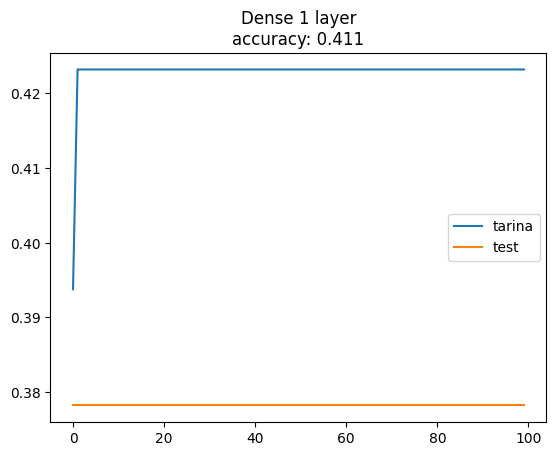

In [19]:
model, history, loss, accuracy = dict_models["Dense_1"]
plot_model_history(history, "Dense 1 layer", accuracy)

# Zad

Sprawdź czy dwie warstwy poprawią wynik?

In [20]:
model2 = Sequential()
model2.add(Flatten(input_shape=X_train.shape[1:]))
model2.add(Dense(128, activation="relu"))
model2.add(Dense(n_classes, activation="softmax"))
#model2.summary()

dict_models["Dense_2"] = train_model(model2)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.3691 - loss: 1.9171 - val_categorical_accuracy: 0.3782 - val_loss: 1.8434
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4426 - loss: 1.7809 - val_categorical_accuracy: 0.3782 - val_loss: 1.7608
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4292 - loss: 1.6886 - val_categorical_accuracy: 0.3782 - val_loss: 1.7505
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4324 - loss: 1.6572 - val_categorical_accuracy: 0.3782 - val_loss: 1.7558
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4002 - loss: 1.6762 - val_categorical_accuracy: 0.3782 - val_loss: 1.7493
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4117 - loss: 1.6389 - val_categorical_accuracy: 0.3782 - val_loss: 1.7467
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4116 - loss: 1.63

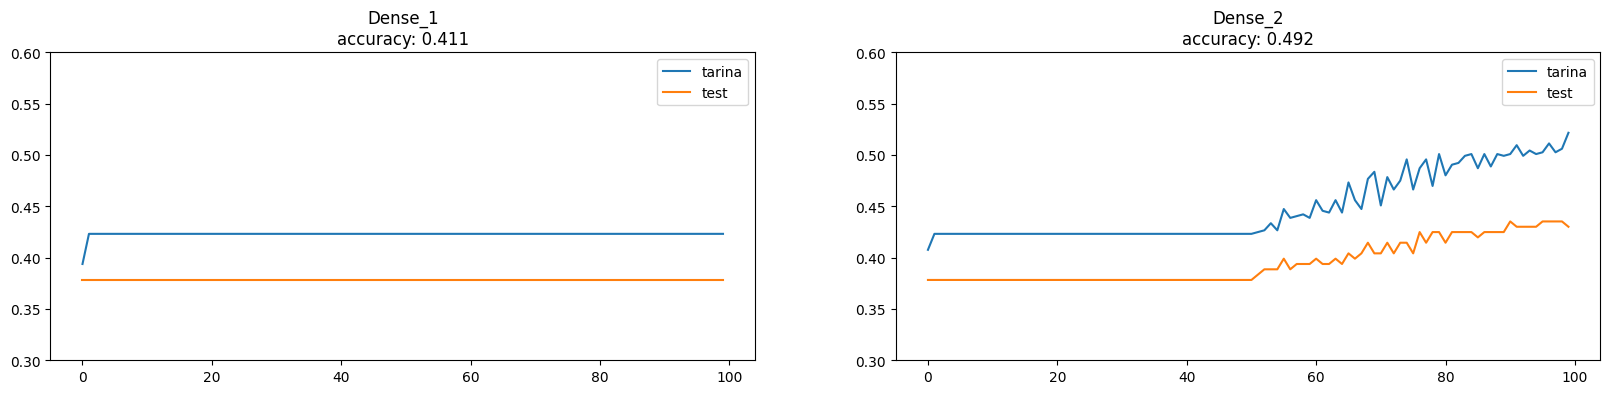

In [21]:
plot_all_models(y_lim=(.3, .6))

# Sieci konwolucyjne

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D

In [22]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Flatten())
model3.add(Dense(n_classes, activation="softmax"))
#model3.summary()

dict_models["Conv_1"] = train_model(model3)

Epoch 1/100


/home/krystianjachna/Desktop/AI/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.3466 - loss: 1.8384 - val_categorical_accuracy: 0.3782 - val_loss: 1.7505
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4320 - loss: 1.6573 - val_categorical_accuracy: 0.3782 - val_loss: 1.7595
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4289 - loss: 1.6637 - val_categorical_accuracy: 0.3782 - val_loss: 1.7432
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4292 - loss: 1.6607 - val_categorical_accuracy: 0.3782 - val_loss: 1.7476
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4254 - loss: 1.6688 - val_categorical_accuracy: 0.3782 - val_loss: 1.7432
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4245 - loss: 1.6596 - val_categorical_accuracy: 0.3782 - val_loss: 1.7495
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4251 - loss: 1.6667 - val_cat

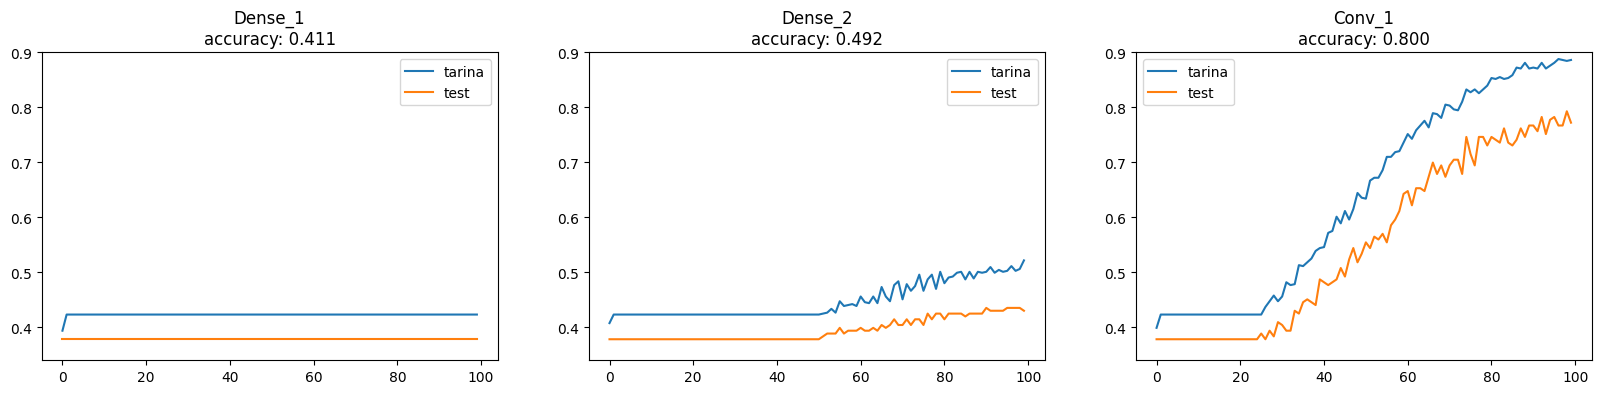

In [23]:
plot_all_models(y_lim=(.34, .9))

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D
* MaxPooling2D

In [24]:
model4 = Sequential()
model4.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(n_classes, activation="softmax"))
# model4.summary()

dict_models["Conv_Max_1"] = train_model(model4)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.3595 - loss: 1.8753 - val_categorical_accuracy: 0.3782 - val_loss: 1.8433
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4272 - loss: 1.6642 - val_categorical_accuracy: 0.3782 - val_loss: 1.7491
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4104 - loss: 1.6812 - val_categorical_accuracy: 0.3782 - val_loss: 1.7772
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3962 - loss: 1.7261 - val_categorical_accuracy: 0.3782 - val_loss: 1.7367
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4241 - loss: 1.6563 - val_categorical_accuracy: 0.3782 - val_loss: 1.7509
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4286 - loss: 1.6618 - val_categorical_accuracy: 0.3782 - val_loss: 1.7436
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4414 - loss: 1.60

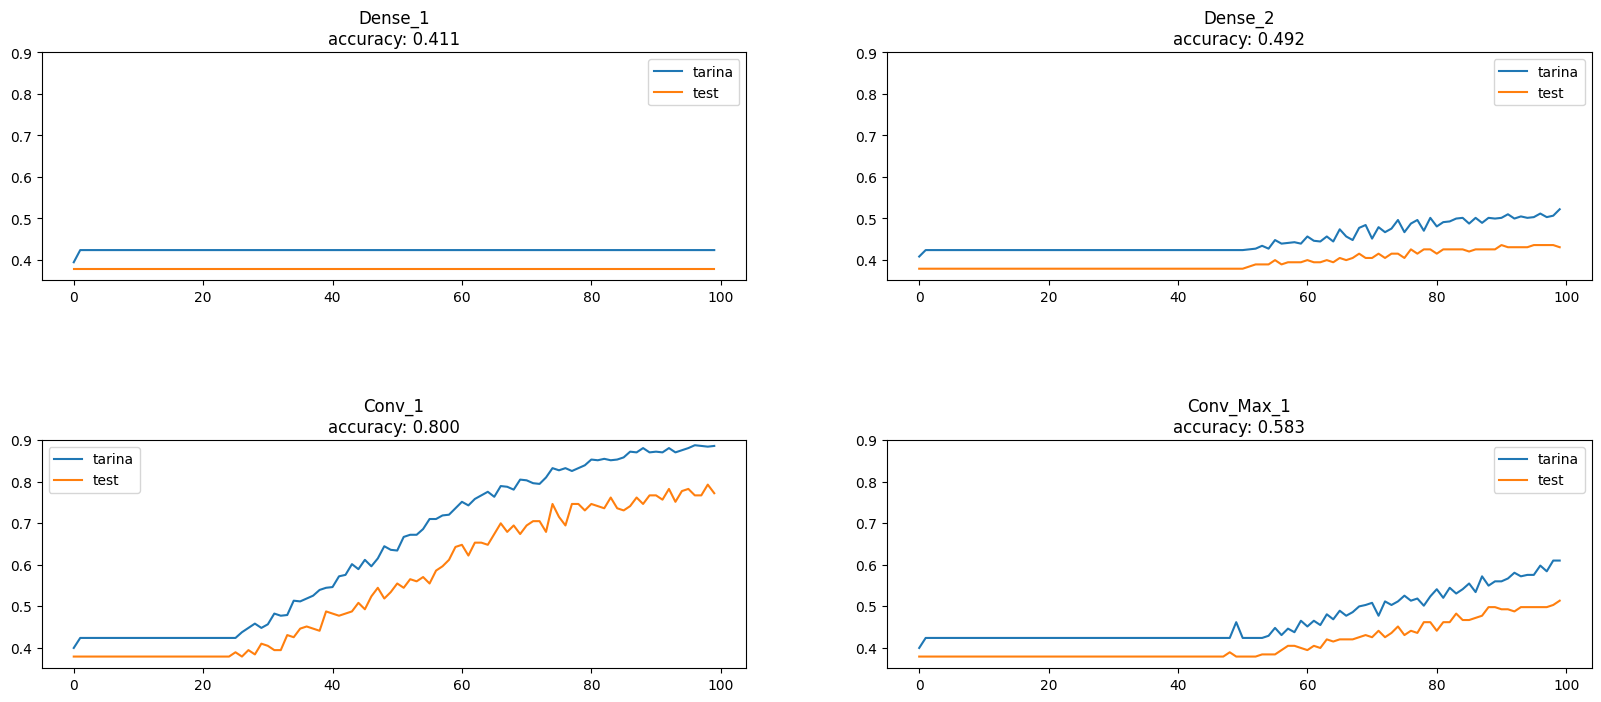

In [25]:
plot_all_models(n_rows=2, y_lim=(.35, .9))

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D

In [26]:
model5 = Sequential()
model5.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:], padding="same"))
model5.add(MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dense(n_classes, activation="softmax"))
# model5.summary()

dict_models["Conv_Max_1_same"] = train_model(model5)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.3483 - loss: 1.8641 - val_categorical_accuracy: 0.3782 - val_loss: 1.8462
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4055 - loss: 1.7392 - val_categorical_accuracy: 0.3782 - val_loss: 1.7521
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4203 - loss: 1.6502 - val_categorical_accuracy: 0.3782 - val_loss: 1.7420
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4137 - loss: 1.6830 - val_categorical_accuracy: 0.3782 - val_loss: 1.7520
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4583 - loss: 1.6191 - val_categorical_accuracy: 0.3782 - val_loss: 1.7461
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4150 - loss: 1.6811 - val_categorical_accuracy: 0.3782 - val_loss: 1.7767
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4311 - loss: 1.65

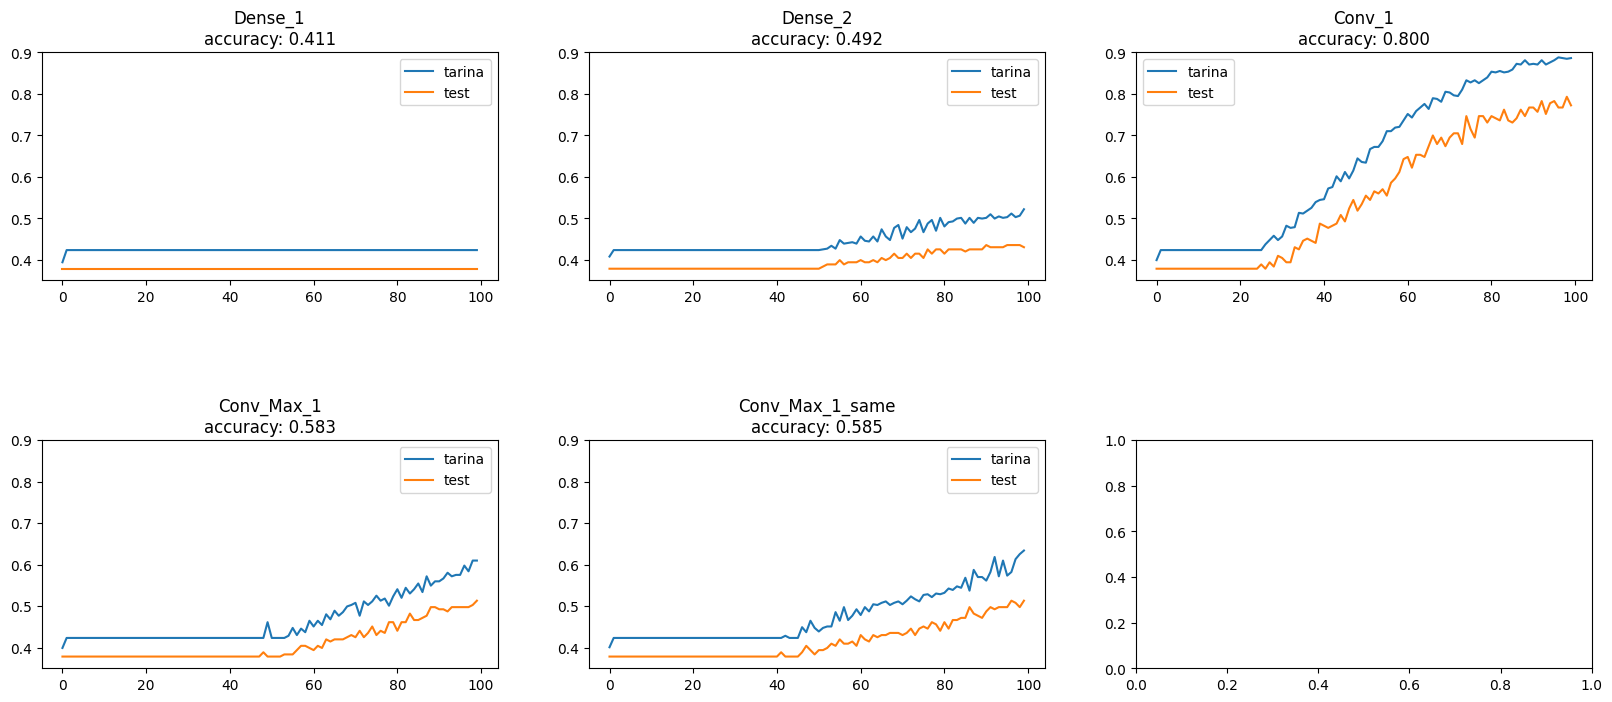

In [27]:
plot_all_models(n_rows=2, y_lim=(.35, .9))

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D
* Conv2D (,padding="same")
* MaxPooling2D

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (2, 2), padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))
# model.summary()

dict_models["Conv_Max_2"] = train_model(model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.3676 - loss: 1.8725 - val_categorical_accuracy: 0.3782 - val_loss: 1.7996
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4124 - loss: 1.6797 - val_categorical_accuracy: 0.3782 - val_loss: 1.7386
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4226 - loss: 1.6775 - val_categorical_accuracy: 0.3782 - val_loss: 1.7521
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4166 - loss: 1.6640 - val_categorical_accuracy: 0.3782 - val_loss: 1.7586
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4158 - loss: 1.6732 - val_categorical_accuracy: 0.3782 - val_loss: 1.7589
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4136 - loss: 1.6764 - val_categorical_accuracy: 0.3782 - val_loss: 1.7433
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4332 - loss: 1.65

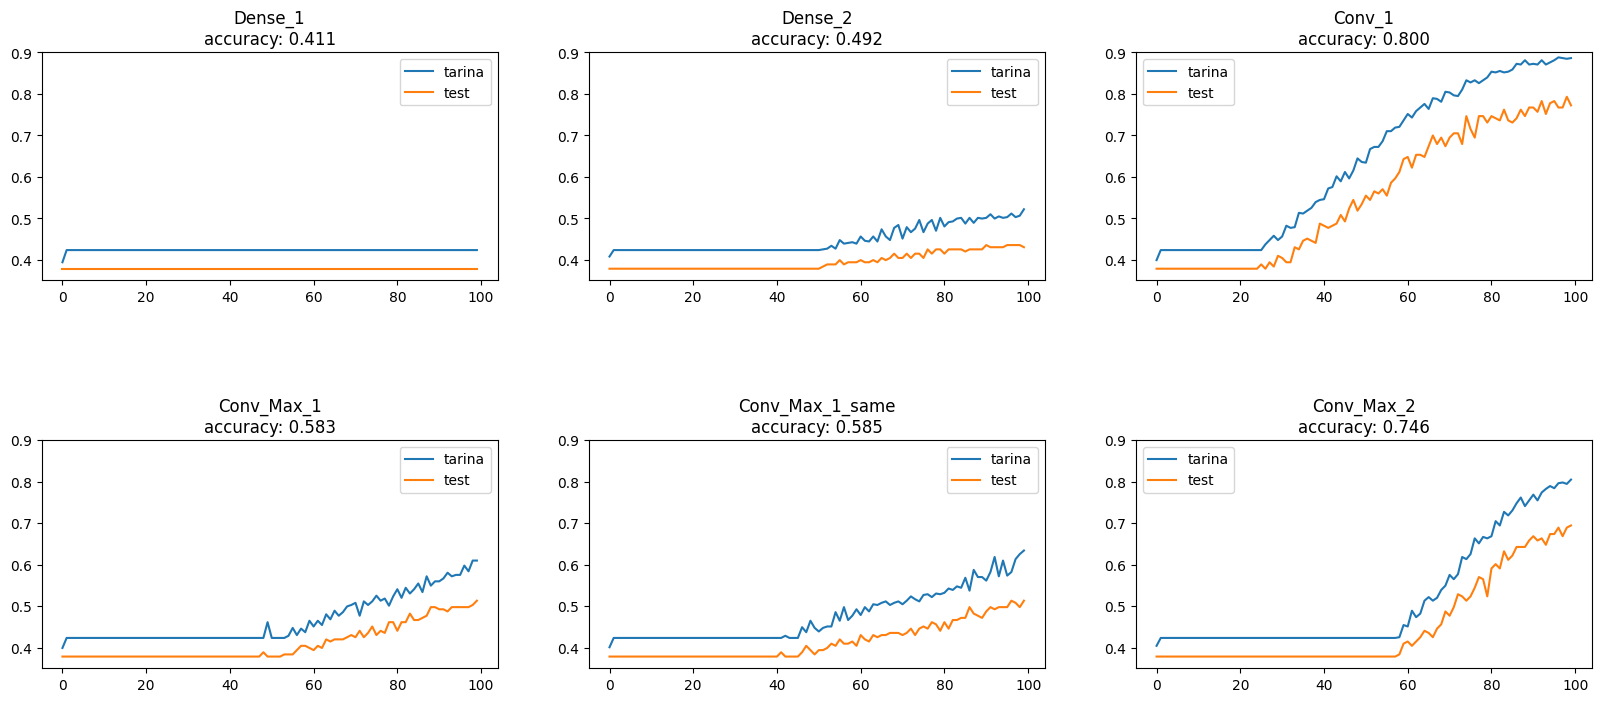

In [29]:
plot_all_models(n_rows=2, y_lim=(.35, .9))

# Zad.

Dodaj: 

* BatchNormalization
* Dropout

```python
model.add(layers.Conv2D(64, (3, 3), ...))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
```

* Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D).
* Often, dropout is only used after the pooling layers, but this is just a rough heuristic.

In [30]:
model5 = Sequential()
model5.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:], padding="same"))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(n_classes, activation="softmax"))
# model5.summary()

dict_models["Conv_Max_BN_Drop"] = train_model(model5)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - categorical_accuracy: 0.3655 - loss: 1.7900 - val_categorical_accuracy: 0.3782 - val_loss: 1.7711
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - categorical_accuracy: 0.4297 - loss: 1.6359 - val_categorical_accuracy: 0.3782 - val_loss: 1.7337
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.4377 - loss: 1.5200 - val_categorical_accuracy: 0.3782 - val_loss: 1.7332
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.4904 - loss: 1.4251 - val_categorical_accuracy: 0.3782 - val_loss: 1.7516
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.5275 - loss: 1.2992 - val_categorical_accuracy: 0.3782 - val_loss: 1.7460
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.5825 - loss: 1.1323 - val_categorical_accuracy: 0.3782 - val_loss: 1.7371
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.6269 - los

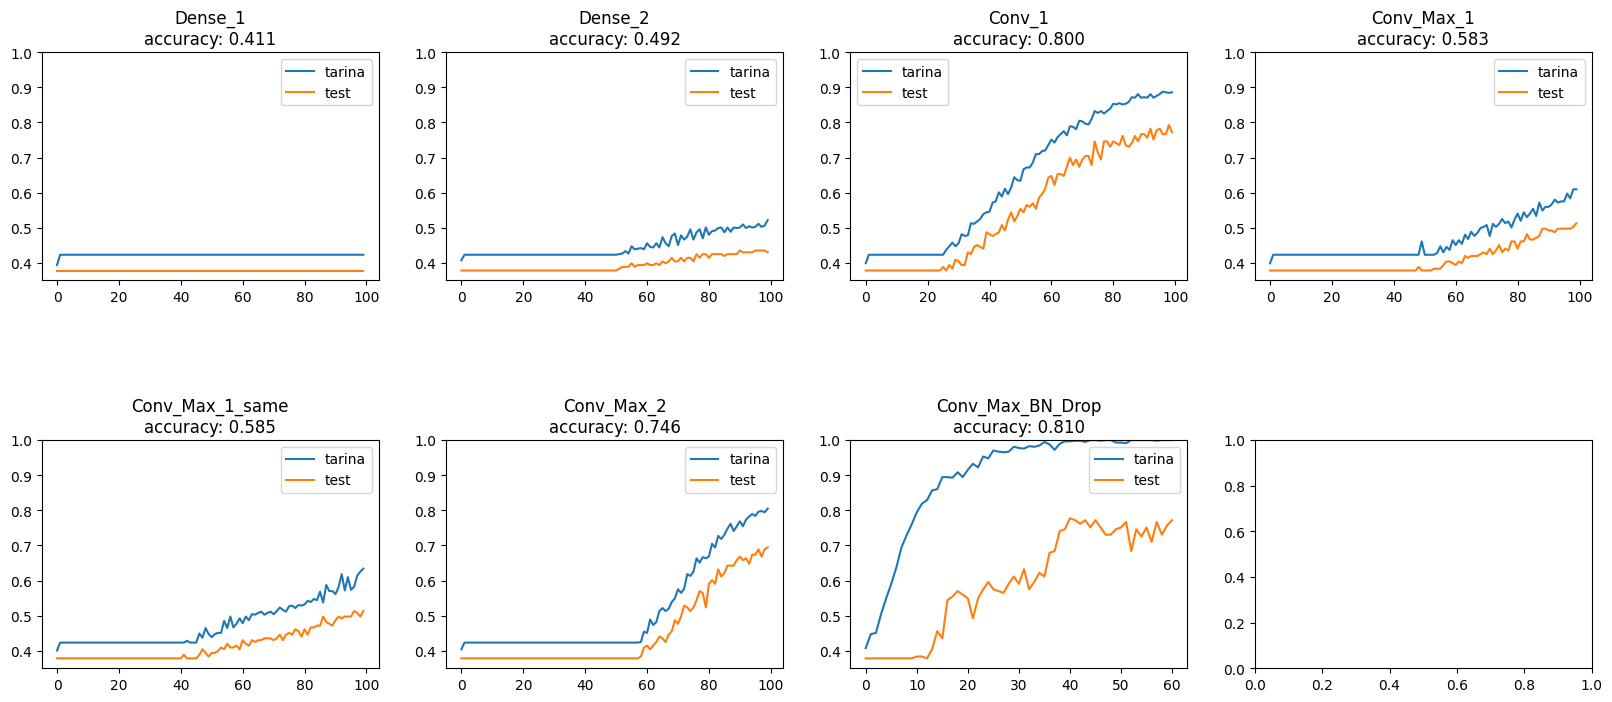

In [31]:
plot_all_models(n_rows=2, y_lim=(0.35, 1))